In [15]:
%matplotlib inline
import math
import os
from scipy.io import matlab
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.5)
import plotly.graph_objects as go
import pathlib
ROOT = pathlib.Path('ExportedDorsoventralData')

In [30]:
ROOT.exists()

True

In [31]:
def matfile_to_sweeps(name):
    path = ROOT / name / ('%s.mat' % name)
    if not path.exists():
        path = ROOT / ('%s.mat' % name)
    data = matlab.loadmat(path)
    sweeps_raw = data[name][0][0][0]
    n_samples, n_sweeps = sweeps_raw.shape
    times = np.linspace(0, 2, n_samples, endpoint=False)
    sweeps = pd.DataFrame(sweeps_raw, index=times, columns=['Sweep %d'%i for i in range(1, n_sweeps+1)])
    sweeps.index.name = 'Time (s)'
    sweeps.title = name
    return sweeps

def protocol_to_sweeps(name, protocol, suffix='_0'):
    path = ROOT / name / ('%s%s.txt' % (protocol, suffix))
    df = pd.read_csv(path, sep='\t', header=None)
    dt = 0.0001
    df.index = np.arange(0, df.shape[0]*dt, dt)
    df.index.name = 'Time (s)'
    n_sweeps = df.shape[1]
    df.columns = ['Sweep %d' % i for i in range(1, n_sweeps+1)]
    df.title = '%s: %s' % (name, protocol)
    return df

In [9]:
sweeps = matfile_to_sweeps('MOB021319')
sweeps.head()

,Sweep 1,Sweep 2,Sweep 3,Sweep 4,Sweep 5,Sweep 6,Sweep 7,Sweep 8,Sweep 9,Sweep 10,...,Sweep 21,Sweep 22,Sweep 23,Sweep 24,Sweep 25,Sweep 26,Sweep 27,Sweep 28,Sweep 29,Sweep 30
Time (s),,,,,,,,,,,,,,,,,,,,,
0.0000,-43.81250,-49.46875,-49.28125,-48.31250,-48.62500,-49.09375,-48.71875,-48.46875,-48.90625,-47.87500,...,-46.65625,-47.00000,-47.28125,-48.03125,-47.56250,-47.53125,-47.37500,-46.15625,-45.68750,-47.78125
0.0001,-43.53125,-49.40625,-49.28125,-48.37500,-48.68750,-49.15625,-48.71875,-48.50000,-48.90625,-47.84375,...,-46.71875,-47.03125,-47.28125,-48.00000,-47.56250,-47.56250,-47.34375,-46.18750,-45.71875,-47.84375
0.0002,-43.59375,-49.46875,-49.31250,-48.43750,-48.65625,-49.15625,-48.71875,-48.46875,-48.87500,-47.87500,...,-46.71875,-47.00000,-47.28125,-48.00000,-47.50000,-47.53125,-47.34375,-46.15625,-45.68750,-47.81250
0.0003,-43.59375,-49.46875,-49.28125,-48.40625,-48.62500,-49.12500,-48.68750,-48.46875,-48.96875,-47.96875,...,-46.65625,-47.03125,-47.25000,-47.96875,-47.56250,-47.50000,-47.43750,-46.18750,-45.71875,-47.81250
0.0004,-43.59375,-49.46875,-49.18750,-48.40625,-48.59375,-49.09375,-48.75000,-48.50000,-48.93750,-47.93750,...,-46.68750,-46.96875,-47.31250,-47.96875,-47.53125,-47.53125,-47.34375,-46.18750,-45.71875,-47.78125


In [10]:
sweeps = protocol_to_sweeps('MOB021319', 'Depolarize')
sweeps.head()

,Sweep 1,Sweep 2,Sweep 3,Sweep 4,Sweep 5,Sweep 6,Sweep 7,Sweep 8,Sweep 9,Sweep 10,...,Sweep 63,Sweep 64,Sweep 65,Sweep 66,Sweep 67,Sweep 68,Sweep 69,Sweep 70,Sweep 71,Sweep 72
Time (s),,,,,,,,,,,,,,,,,,,,,
0.0000,-49.53125,-50.46875,-50.93750,-50.68750,-48.96875,-50.50000,-50.46875,-51.18750,-51.15625,-49.15625,...,-49.03125,-47.31250,-48.62500,-48.96875,-47.75000,-47.96875,-48.59375,-48.03125,-47.62500,-47.81250
0.0001,-49.53125,-50.37500,-50.90625,-50.68750,-48.96875,-50.50000,-50.37500,-51.21875,-51.09375,-49.18750,...,-49.03125,-47.28125,-48.56250,-48.96875,-47.71875,-47.96875,-48.59375,-47.96875,-47.56250,-47.84375
0.0002,-49.43750,-50.43750,-50.93750,-50.68750,-48.93750,-50.50000,-50.37500,-51.18750,-51.15625,-49.18750,...,-49.03125,-47.34375,-48.65625,-48.96875,-47.78125,-48.00000,-48.65625,-47.96875,-47.59375,-47.84375
0.0003,-49.46875,-50.43750,-50.90625,-50.71875,-48.90625,-50.50000,-50.40625,-51.15625,-51.09375,-49.21875,...,-49.09375,-47.28125,-48.50000,-48.96875,-47.78125,-48.03125,-48.62500,-47.96875,-47.59375,-47.81250
0.0004,-49.43750,-50.40625,-50.93750,-50.71875,-48.87500,-50.46875,-50.37500,-51.15625,-51.09375,-49.15625,...,-49.06250,-47.34375,-48.56250,-48.90625,-47.71875,-48.06250,-48.68750,-47.93750,-47.62500,-47.81250


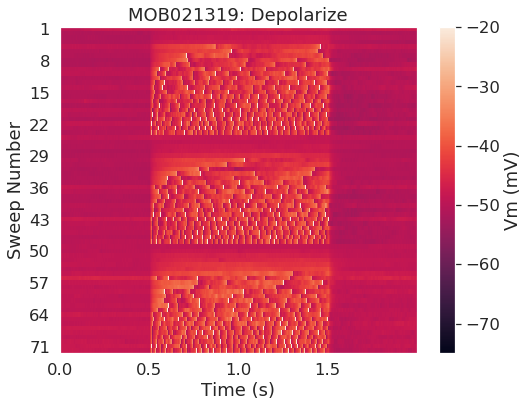

In [12]:
def sweeps_to_image(sweeps, ax=None):
    if ax is None:
        fig = plt.figure(figsize=(8,6))
        ax = plt.gca()
    else:
        fig = plt.gcf()
    image = ax.imshow(sweeps.T, aspect='auto', vmin=-75, vmax=-20)
    ax.grid(False)
    from matplotlib import cm
    fig.colorbar(image, ax=ax, label='Vm (mV)')
    ax.set_title(sweeps.title)
    ax.set_xticks(np.arange(0, 20000, 5000))
    ax.set_xticklabels(np.arange(0, 2, 0.5))
    ax.set_xlabel('Time (s)')
    n_sweeps = sweeps.shape[1]
    y_skip = 1 if n_sweeps<20 else int(n_sweeps/10)
    ax.set_yticks(range(0, n_sweeps, y_skip))
    ax.set_yticklabels(range(1, n_sweeps+1, y_skip))
    ax.set_ylabel('Sweep Number')
    ax.set_ylim(n_sweeps-0.5, -0.5)
    
sweeps_to_image(sweeps)

In [14]:
"""
def go_scatter(sweeps, i):
    return go.Scatter(y=sweeps['Sweep %d' % i],
                      x=sweeps.index,
                      mode='lines',
                      name='Sweep %d' % i)

def plot_sweeps(sweeps, sweep_list=None):
    if sweep_list is None:
        n_sweeps = sweeps.shape[1]
        sweep_list = range(1, n_sweeps+1)
    data = [go_scatter(sweeps, i) for i in sweep_list]
    fig = go.Figure(data=data, layout={'xaxis': {'title': 'Time (s)'},
                                       'yaxis': {'title': 'Vm (mV)'},
                                       'title': sweeps.title})
    fig.show()
    
plot_sweeps(sweeps)
""";

In [43]:
def get_recordings():
    recordings = []
    for dirname in os.listdir(ROOT):
        if os.path.isdir(ROOT / dirname):
            recordings.append(dirname)
    return recordings

def make_summary(recordings, protocol=None, suffix='_0', max_sweeps=None):
    fig, axes = plt.subplots(math.ceil(len(recordings)/4), 4, sharex=True, figsize=(30,60))
    for i, recording in enumerate(recordings):
        ax = axes.flat[i]
        if protocol is None or protocol.lower()=='spontaneous':
            sweeps = matfile_to_sweeps(recording)
        else:
            sweeps = protocol_to_sweeps(recording, protocol.title(), suffix=suffix)
        sweeps_to_image(sweeps, ax=ax)
        if max_sweeps:
            ax.set_ylim(max_sweeps-0.5, -0.5)
    # Hide axes with no images
    while True:
        i += 1
        try:
            axes.flat[i].axis('off')
        except:
            break
    plt.tight_layout()
    protocol = protocol if protocol else 'spontaneous'
    plt.savefig('%s.pdf' % protocol.lower(), format='pdf')

In [38]:
recordings = get_recordings()
"There are %d sets of recordings." % len(recordings)

'There are 30 sets of recordings.'

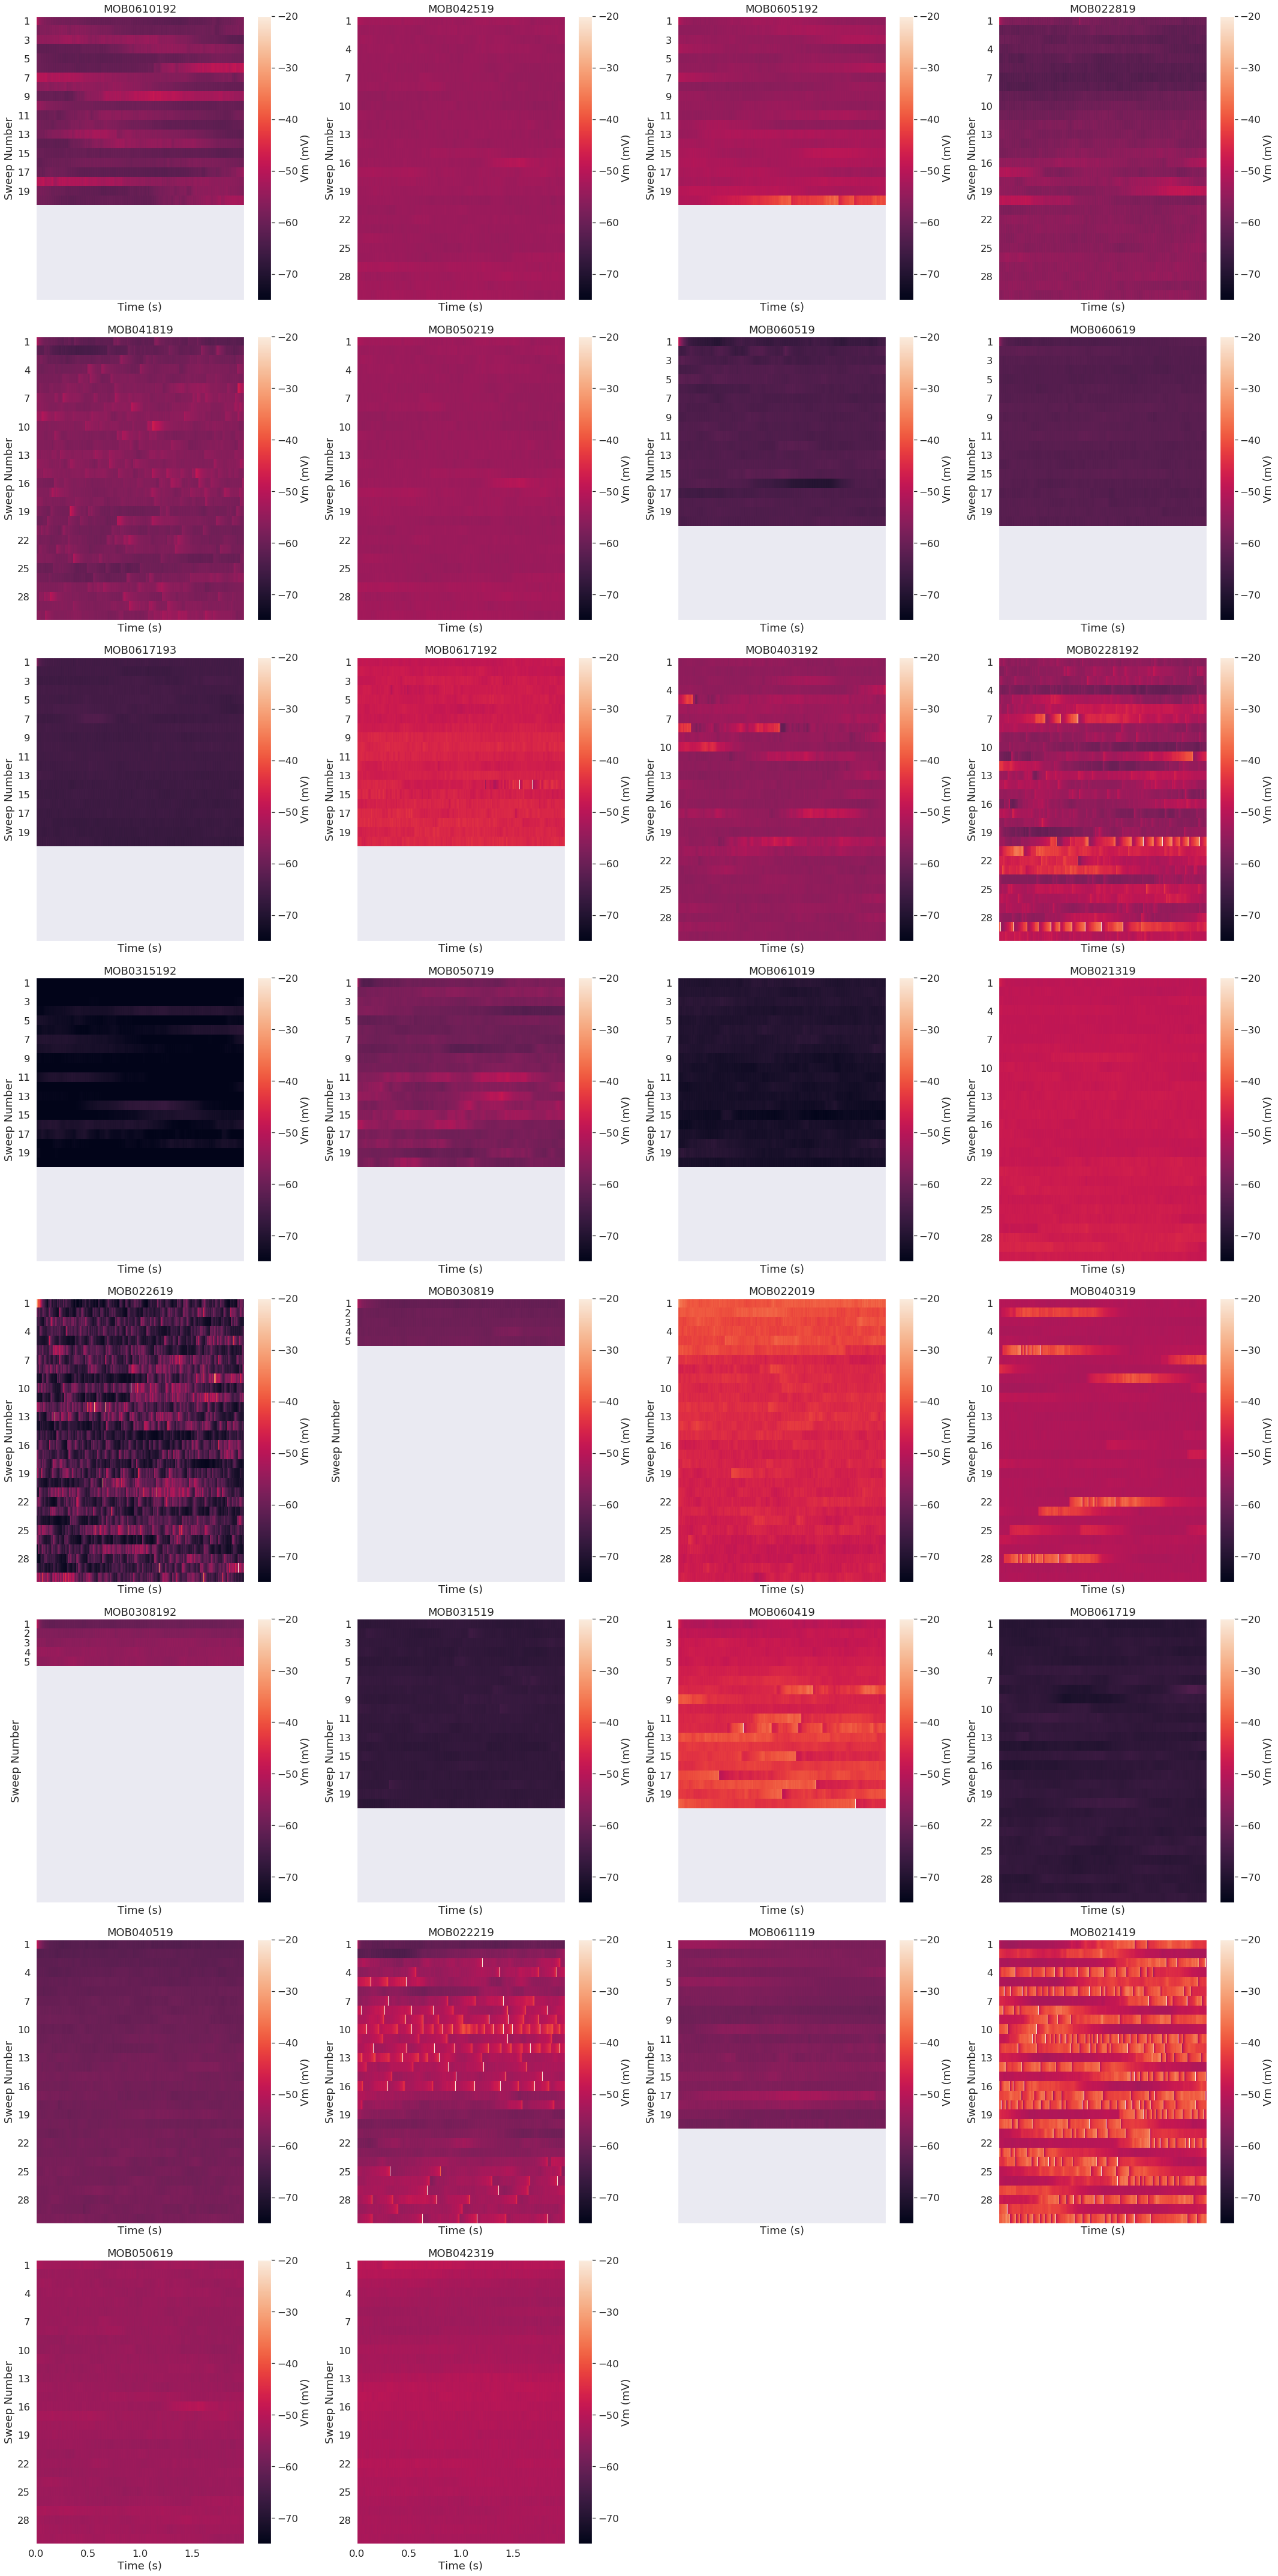

In [39]:
make_summary(recordings, 'spontaneous', max_sweeps=30)

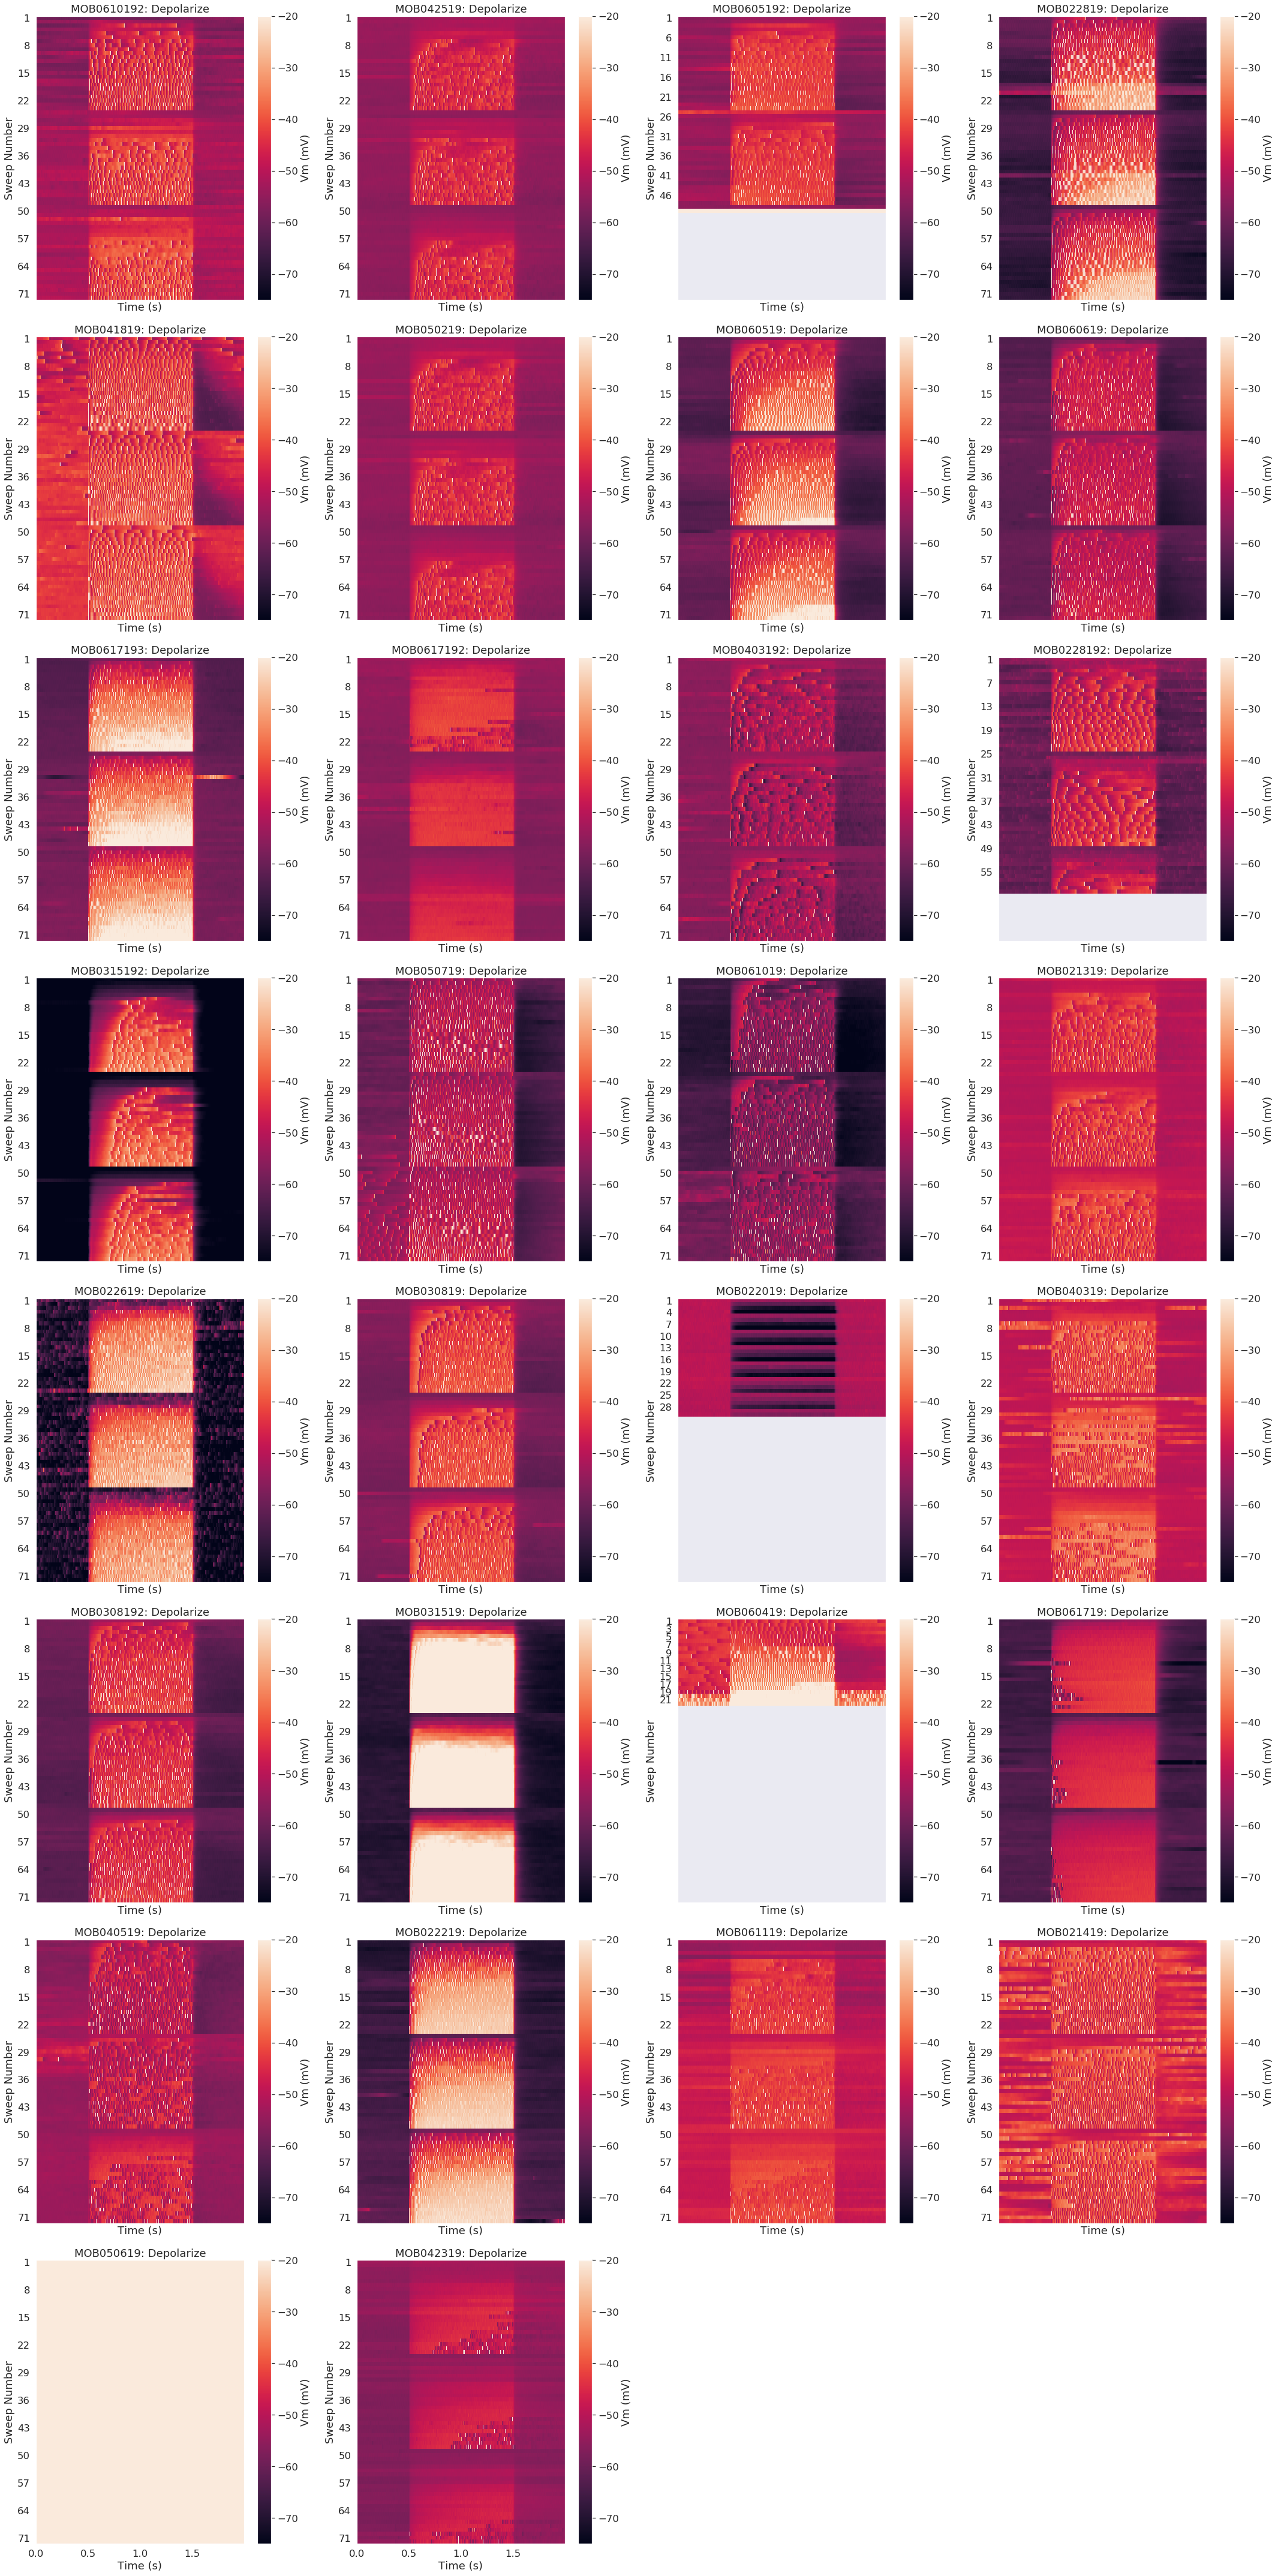

In [42]:
make_summary(recordings, 'Depolarize', max_sweeps=72)